In [261]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [222]:
data = pd.read_csv('50_Startups.csv')

In [223]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [224]:
data.shape

(50, 5)

In [225]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [226]:
data.duplicated().sum()

0

In [227]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


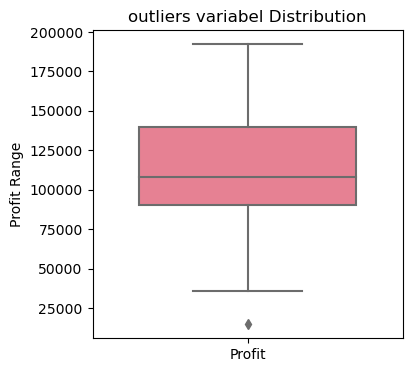

In [228]:
outliers = ['Profit']
plt.rcParams['figure.figsize']=[4,4]
sns.boxplot(data=data[outliers], orient="v" , palette="husl" , width=0.7)

plt.title("outliers variabel Distribution")
plt.ylabel("Profit Range")

plt.show()

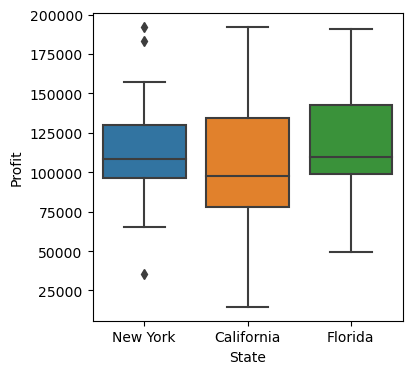

In [229]:
sns.boxplot(x='State' , y = 'Profit' , data=data)
plt.show()

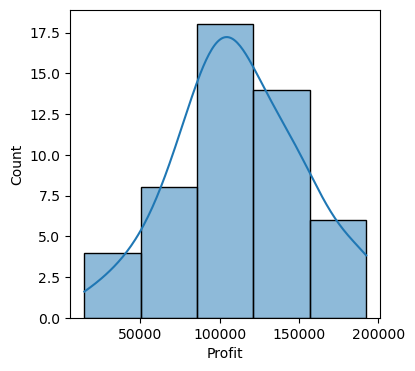

In [230]:
sns.histplot(data['Profit'], bins=5,kde=True)
plt.show()

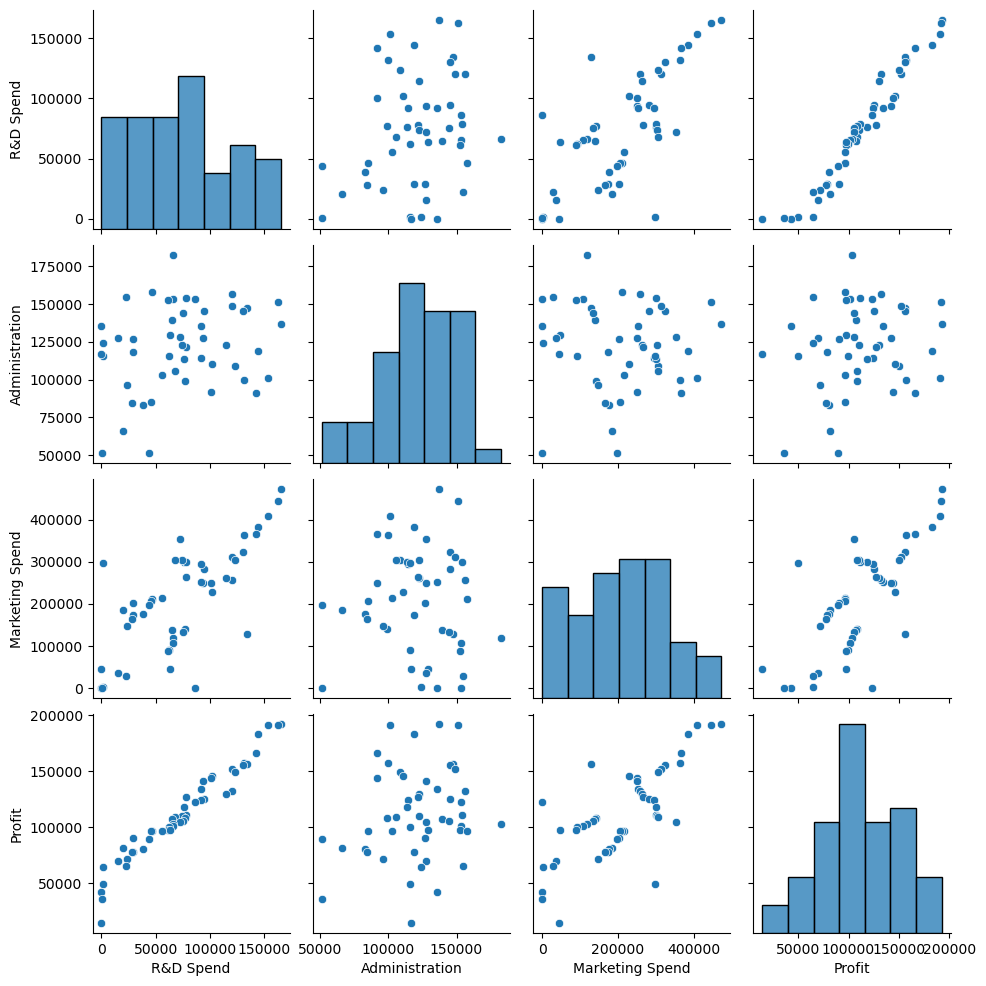

In [231]:
sns.pairplot(data)
plt.show()

In [232]:
x = data[['R&D Spend','Administration','Marketing Spend']]
y = data["Profit"]
x=x.to_numpy()
y=y.to_numpy()
y=y.reshape(-1,1)

In [233]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train ,y_test = train_test_split(x, y, test_size=0.3,random_state=45) 

# LINEAR REGRESSION

In [248]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
ypred =model.predict(x_test)
data = pd.DataFrame(data={"Predicted Profit":ypred.flatten()})

training_data_model_score = model.score(x_train, y_train)
print(f"model Score/Performance on Training data {training_data_model_score:.3f}")

testing_data_model_score = model.score(x_test, y_test)
print(f"model Score/Performance on Testing data {testing_data_model_score:.3f}")

model Score/Performance on Training data 0.932
model Score/Performance on Testing data 0.982


In [262]:
df = pd.DataFrame(data={'Predicted value':ypred.flatten(),'Actual Value':ytest.flatten()})
df

,Predicted value,Actual Value
0,46175.481940,42559.73
1,159646.982271,155752.60
2,181884.474242,191050.39
3,154579.191248,149759.96
4,163338.656668,156991.12
5,110174.065468,105733.54
6,127176.628884,134307.35
7,89566.075848,89949.14
8,192234.156468,192261.83
9,114969.660868,122776.86


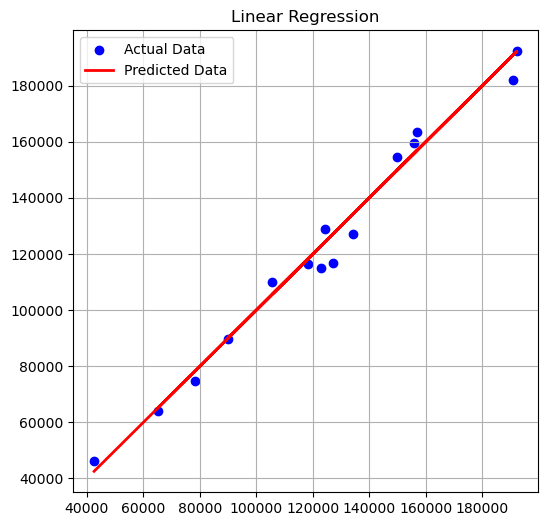

In [236]:
plt.figure(figsize=(6, 6))
plt.scatter(df['Actual Value'], df['Predicted value'], color='blue', label='Actual Data')
plt.plot(df['Actual Value'], df['Actual Value'], color='red', linestyle='-', linewidth=2, label='Predicted Data')  # Diagonal line for reference
plt.title('Linear Regression')
plt.legend()
plt.grid(True)
plt.show()

In [237]:

r2Score = r2_score(ypred, y_test)
mse=mean_squared_error(ypred, y_test)
rmse=np.sqrt(mean_squared_error(ypred, y_test))

print("Mean Squared Error is:", mse)
print("Root Mean Squared Error is:", rmse)
print("R-Squared score of model is : ", r2Score)

Mean Squared Error is: 30114660.86441897
Root Mean Squared Error is: 5487.682649754718
R-Squared score of model is :  0.9822165488084384


# GRADIENT BOOSTING REGRESSION

In [238]:
gradient_boosting = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gradient_boosting.fit(x_train, y_train)

# Making predictions on the test set
y_pred_gb = gradient_boosting.predict(x_test)

# Calculating evaluation metrics on the test set
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
print(f"Mean Squared Error : {mse_gb:.2f}")
print(f"R-squared : {r2_gb:.2f}")

Mean Squared Error : 83392317.94
R-squared : 0.95


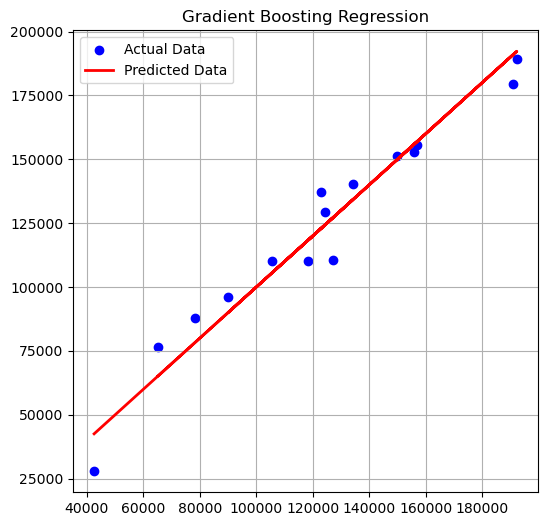

In [239]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_gb, color='blue', label='Actual Data')
plt.plot(y_test, y_test, color='red', linestyle='-', linewidth=2, label='Predicted Data')
plt.title('Gradient Boosting Regression')
plt.legend()
plt.grid(True)
plt.show()

# SUPPORT VECTOR REGRESSION

In [259]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Create and train the SVR model
svr = SVR(kernel='poly', gamma=6)
svr.fit(x_train_scaled, y_train)

# Predict on the test set
y_pred_svr = svr.predict(x_test_scaled)

# Calculate R-squared and MSE
r2_svr = r2_score(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
print(f"R-squared (Test set): {r2_svr:.4f}")
print(f"Mean Squared Error (Test set): {mse_svr:.2f}")

R-squared (Test set): 0.8255
Mean Squared Error (Test set): 299477775.19


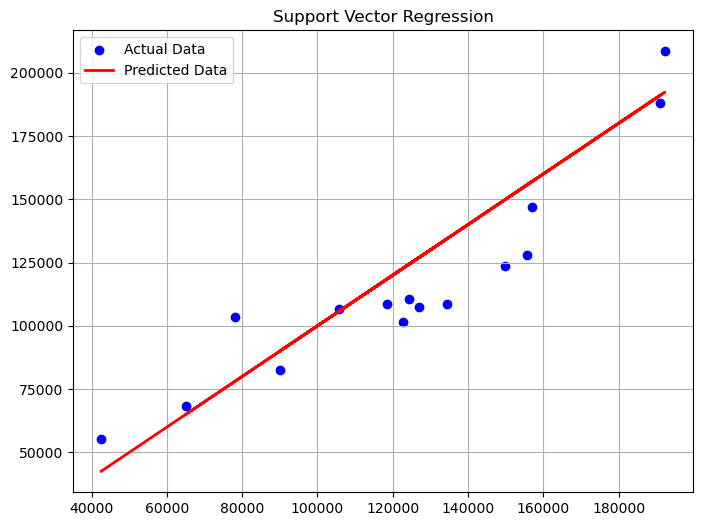

In [260]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_svr, color='blue', label='Actual Data')
plt.plot(y_test, y_test, color='red', linestyle='-', linewidth=2, label='Predicted Data')
plt.title('Support Vector Regression')
plt.legend()
plt.grid(True)
plt.show()

# POLYNOMIAL REGRESSION

In [242]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(x)

# Training the Polynomial Regression model
poly_regression = LinearRegression()
poly_regression.fit(X_poly, y)

# Making predictions
y_pred_PR = poly_regression.predict(X_poly)

# Evaluating the model
mse = mean_squared_error(y, y_pred_PR)
r2 = r2_score(y, y_pred_PR)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 72642570.85
R-squared: 0.95


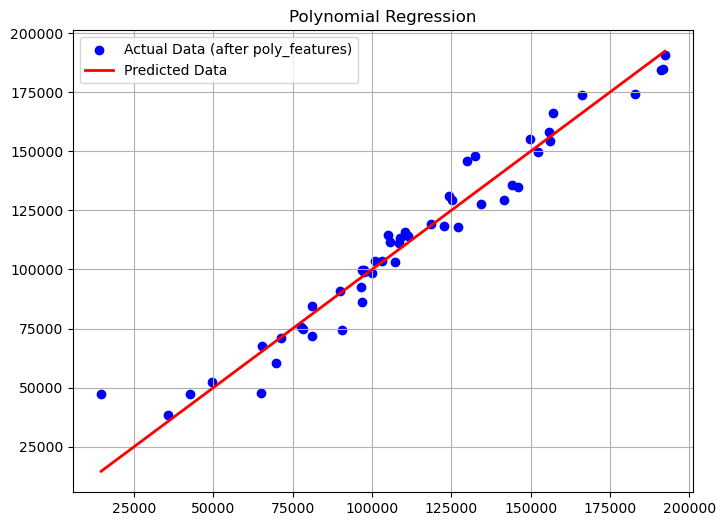

In [243]:
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred_PR, color='blue', label='Actual Data (after poly_features)')
plt.plot(y, y, color='red', linestyle='-', linewidth=2, label='Predicted Data')
plt.title('Polynomial Regression')
plt.legend()
plt.grid(True)
plt.show()

# RANDOM FOREST REGRESSION

In [244]:
# Random Forest
random_forest_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_regressor.fit(x_train, y_train)
y_pred_rf = random_forest_regressor.predict(x_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("Mean Squared Error: " , mse_rf)
print("R-sqaured: ", r2_rf)


Mean Squared Error:  64932980.87782086
R-sqaured:  0.9621570742392656


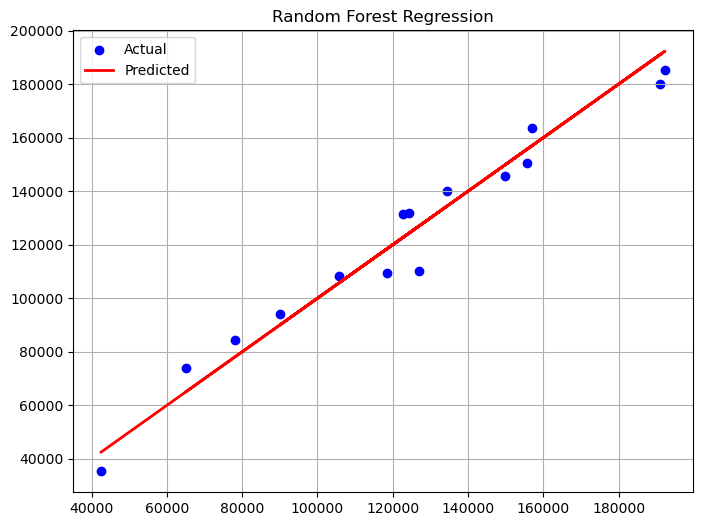

In [245]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, color='blue', label='Actual')
plt.plot(y_test, y_test, color='red', linestyle='-', linewidth=2, label='Predicted')
plt.title('Random Forest Regression')
plt.legend()
plt.grid(True)
plt.show()

# DECISION TREE REGRESSION

In [246]:
# Decision Trees
decision_tree_regressor = DecisionTreeRegressor(random_state=42)
decision_tree_regressor.fit(x_train, y_train)
y_pred_dt = decision_tree_regressor.predict(x_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print("Mean Squared Error: " , mse_dt)
print("R-sqaured: ", r2_dt)


Mean Squared Error:  129792424.45102002
R-sqaured:  0.9243570060021165


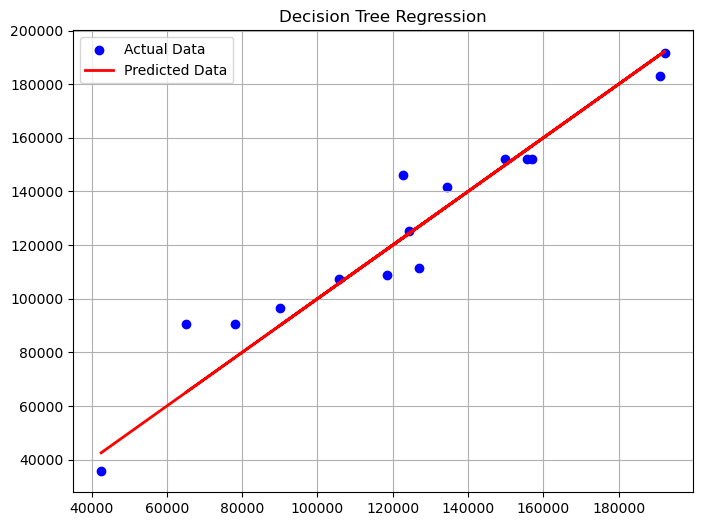

In [247]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_dt, color='blue', label='Actual Data')
plt.plot(y_test, y_test, color='red', linestyle='-', linewidth=2, label='Predicted Data')
plt.title('Decision Tree Regression')
plt.legend()
plt.grid(True)
plt.show()